# <font color=blue> Linear Classification:</font>
In this problem, a population $P$ (often people, but not necessary) refers to a collection of distinct objects, called its *members*.   Associated with each member $m_k$ is a
vector $v_k$ of values of known, delineated traits
of that member, called the member's $\textit{features}$.  The dimension of each feature vector is $n_F \times 1$.
Hence, using this feature vector, each member of the population can
be represented as a point in $n_F$ dimensional space.  Note though, it is possible for two different members to have identical features.

Suppose the the population $P$ is divided into two distinct groups, $G_1$ and $G_2$. 
The goal of *linear classification*, is to find a linear function, $L(v) := c^T v + b$, such that
\begin{align}
c^T v_k + b  > 0 \ \  {\rm for \ all} \ v_k \in G_1
\end{align}
and
\begin{align}
c^T v_k + b  < 0 \ \  {\rm for \ all} \ v_k \in G_2
\end{align}

In other words, the linear inequalities $c^T v + b >0$ and $c^T v + b < 0$ split
the $n_F$-dimensional space into two nonintersecting halfspaces, and one group of the population lies entirely in one halfspace, while the other group lies in the other halfspace.  The linear function $L(v) := c^T v + b$ is said to *classify* the population into the two groups.  **Such a function is often used as
a predictor for another person, attempting to predict which group it belongs to, based on
the value of $L(v)$, where $v$ is the known vector of this person's traits.**

A concrete example will make the ideas clear.  Suppose $n_F = 2$, and the traits (features) are the 2-dimensional vector
\begin{align}
v = \left[ \begin{array}{l}
{\rm age} \\
{\rm number \ of \ action \ movies \ seen \ this \ year} \end{array}
\right]
\end{align}

The population consists of $n_P$ people who have just viewed a pre-release showing
of a new movie, called MovieX.   The two groups consists of the people who liked (based on a short exit survey)
MovieX ($G_1$), and those people who did not like MovieX ($G_2$).
Using this data, the producers of MovieX want to build a linear classifier (based on *age*
and *number of action movies seen this year*) which will predict if another person (outside this population set) will like the movie, so they can target their promotions accordingly
(eg., if they discover that older viewers who don't see many action movies prefer MovieX, then they might do a pamphlet-handout to middle-aged people buying non-action movie tickets a week before MovieX is released).

The generalization is as follows:
Given two sets of points

\begin{align}
G_1 = (v_1,v_2,...,v_N), \quad
G_2 = (v_{N+1},v_{N+2}, ... v_{P})
\end{align}

where each $v_k \in {\bf R}^{n_F}$.
The task is to find a linear constraint that "separates" them.  
Specifically, find $c \in {\bf R}^{n_F}$ and $b \in {\bf R}$ such that

\begin{align}
c^T v_k + b > 0  \ {\rm for \ all} \  k \leq N
\end{align}

and

\begin{align}
c^T v_k + b < 0  \ {\rm for \ all} \  k > N.
\end{align}

Note that if this is possible, then simply by scaling $c$ and $b$, it follows that

\begin{align}
c^T v_k + b \geq 1  \ {\rm for \ all} \  k \leq N
\end{align}
and
\begin{align}
c^T v_k + b \leq -1  \ {\rm for \ all} \  k > N.
\end{align}
A serious problem is that there may be some outliers in the data so that the two sets $G_1$ and $G_2$ simply can't be separated by a hyperplane (ie., there is some discrete overlap in the points).  For those points, we need to add/subtract a nonnegative slack variable, $t_k \geq 0$ to make it work, so perhaps we adjust the requirement to
\begin{align}
c^T v_k + b \geq 1-t_k  \ {\rm for \ all} \  k \leq N
\end{align}
and
\begin{align}
c^T v_k + b \leq -(1-t_k)  \ {\rm for \ all} \  k > N.
\end{align}
But, hopefully $\textbf{most points don't need this adjustment}$, so we force the
use of such $t_k$ to a minimum
by minimizing $\sum_{k=1}^P t_k$.    This results in a linear program of the form
\begin{align}
\min_{c,b,t_1,\ldots,t_P} \ t_1+t_2+\cdots + t_P
\end{align}
subject to
\begin{align}
t_1 \geq 0, t_2 \geq 0 , \ldots , t_P \geq 0
\end{align}
and
\begin{align}
c^T v_k + b \geq 1-t_k  \ {\rm for \ all} \  k \leq N
\end{align}
and
\begin{align}
c^T v_k + b \leq -(1-t_k)  \ {\rm for \ all} \  k > N.
\end{align}

Write a function call $\texttt{buildLinClass}$, with function declaration line

In [ ]:
def buildLinClass(G1, G2):
  
    return c,b,t

The input arguments $G_1$ and $G_2$ are real-values arrays of dimension
$n_F \times p_1$ and $n_F \times p_2$, respectively.   Each column is a feature
vector of a particular person in that group.

The output arguments are a $n_F \times 1$ vector $c$ and a scalar value $b$, such
that the linear function $L(v) := c^T v + b$ approximately classifies the two groups,
with $L(v) >0$ for members of $G_1$ and $L(v) < 0$ for members in $G_2$.  
Of course, because of outliers, the classification is not necessarily exact, but the linear program minimization has minimized the total amount of slack variables used to create the separation.  The 3rd output argument is the vector of required corrections $t$,
and is of dimension $(p_1 + p_2) \times 1$.

We can try the function out on synthetic data (which has no outliers) below.   Here there are only 2 features, so we can visually see the classification (could also do in 3-dimenions).  Note that in practice, the number of features is usually much larger than 2, and hence cannot be visualized.

In [ ]:
import numpy as np
import scipy as cp
import cvxpy as cv
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers


def buildLinClass(G1, G2):

  N = G1.shape[1]

  l = np.concatenate((np.zeros([nF+1, 1]), np.ones([nP, 1])))
  
  A1 = np.concatenate((np.zeros([nP, nF+1]), -1*np.eye(nP)), axis=1)
  h1 = np.zeros([nP, 1])
  A2 = np.concatenate(((-1*(G1.T), -1*np.ones([N,1]), -1*np.eye(N), np.zeros([N, nP-N]))), axis=1)
  h2 = -1*np.ones([N,1])
  A3 = np.concatenate(((G2.T, np.ones([nP-N,1]), np.zeros([nP-N, N]), -1*np.eye(nP-N))), axis=1)
  h3 = -1*np.ones([nP-N,1])
  A = np.concatenate((A1, A2, A3))
  h = np.concatenate((h1, h2, h3))

  l = cvxopt.matrix(l, tc='d')
  A = cvxopt.matrix(A, tc='d')
  h = cvxopt.matrix(h, tc='d')

  solution = cvxopt.solvers.lp(l, A, h)

  c = solution['x'][:nF]
  b = solution['x'][nF+1]
  t = solution['x'][(nF+2):]

  return c,b,t

     pcost       dcost       gap    pres   dres   k/t
 0:  1.7135e+01  1.8121e+02  7e+02  2e+00  1e+01  1e+00
 1:  2.0133e+01  6.8264e+01  1e+02  7e-01  4e+00  2e+00
 2:  1.9116e+01  5.0427e+01  9e+01  4e-01  2e+00  1e+00
 3:  1.4309e+01  2.5986e+01  4e+01  2e-01  8e-01  7e-01
 4:  1.1000e+01  1.9397e+01  3e+01  1e-01  6e-01  5e-01
 5:  7.0983e+00  1.1731e+01  2e+01  6e-02  3e-01  3e-01
 6:  3.6292e+00  5.4400e+00  9e+00  2e-02  1e-01  1e-01
 7:  2.4197e+00  3.2388e+00  5e+00  1e-02  6e-02  5e-02
 8:  2.2716e+00  2.8652e+00  5e+00  8e-03  4e-02  4e-02
 9:  2.2102e+00  2.7583e+00  6e+00  7e-03  4e-02  4e-02
10:  1.0684e+00  1.3410e+00  3e+00  4e-03  2e-02  2e-03
11:  2.9405e-01  3.6414e-01  9e-01  1e-03  5e-03  2e-03
12:  3.3776e-03  4.2177e-03  1e-02  1e-05  6e-05  2e-05
13:  3.3785e-05  4.2189e-05  1e-04  1e-07  6e-07  2e-07
14:  3.3785e-07  4.2189e-07  1e-06  1e-09  6e-09  2e-09
15:  3.3785e-09  4.2189e-09  1e-08  1e-11  6e-11  2e-11
Optimal solution found.


(-3.882721301755895, 3.721921929650536, -2.7788452378022255, 2.941619624465469)

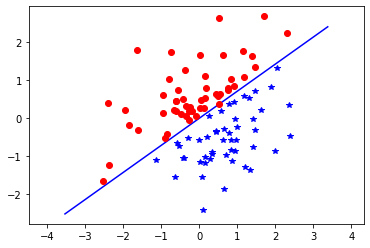

In [ ]:
nF = 2
nP = 100
cTrue = np.random.randn(nF,1)
bTrue = np.random.randn(1,1)
Pop = np.random.randn(nF, nP) 

LPop =  cTrue.T@Pop + bTrue
idx_pos = np.argwhere(LPop>0)
idx_neg = np.argwhere(LPop<0)

G1 = Pop[:, idx_pos[:,1]]  # create the populations based on their L-value
G2 = Pop[:, idx_neg[:,1]]  # create the populations based on their L-value

[cEst, bEst, tAdjust] =  buildLinClass(G1,G2)

max(abs(tAdjust))      # should be 0 (or very close)
f1Min = np.min(Pop[0,:])  # minimum age
f1Max = np.max(Pop[0,:])  # maximum age
f2Min = np.min(Pop[1,:])  # minimum number of movies
f2Max = np.max(Pop[1,:])  # maximum number of movies

plt.plot(np.array([f1Min-1, f1Max+1]), -(cEst[0]*np.array([f1Min-1, f1Max+1])+bEst)/cEst[1],'b')
plt.plot(G1[0,:],G1[1,:],'b*')
plt.plot(G2[0,:],G2[1,:],'ro')
plt.xlim([f1Min-0.1, f1Max+0.1])
plt.ylim([f2Min-0.1, f2Max+0.1])
plt.axis('equal')

We can add some random noise to 10\% of the data, so that outliers appear.   Now the classification will likely not be perfect,
but will still make good sense.  Run this several times to gain intuition.

     pcost       dcost       gap    pres   dres   k/t
 0:  1.9126e+01  1.9188e+02  8e+02  2e+00  2e+01  1e+00
 1:  2.2406e+01  7.9355e+01  2e+02  8e-01  5e+00  2e+00
 2:  2.1039e+01  7.4658e+01  2e+02  7e-01  5e+00  2e+00
 3:  2.1660e+01  5.7958e+01  1e+02  5e-01  3e+00  2e+00
 4:  1.7003e+01  2.5183e+01  3e+01  1e-01  7e-01  5e-01
 5:  1.4481e+01  1.9370e+01  2e+01  6e-02  4e-01  3e-01
 6:  1.2554e+01  1.5106e+01  1e+01  3e-02  2e-01  2e-01
 7:  1.1039e+01  1.1979e+01  4e+00  1e-02  8e-02  5e-02
 8:  1.0202e+01  1.0296e+01  4e-01  1e-03  8e-03  1e-03
 9:  1.0111e+01  1.0122e+01  5e-02  2e-04  1e-03  1e-04
10:  1.0100e+01  1.0101e+01  2e-03  7e-06  4e-05  6e-06
11:  1.0100e+01  1.0100e+01  2e-05  7e-08  5e-07  7e-08
12:  1.0100e+01  1.0100e+01  2e-07  7e-10  5e-09  7e-10
Optimal solution found.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(-3.5196010201613355,
 3.3987318899395342,
 -2.597234125337584,
 3.8525123351797226)

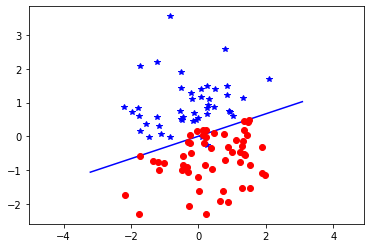

In [ ]:
nF = 2
nP = 100
nOut = np.int(0.1*nP)
cTrue = np.random.randn(nF,1)
bTrue = np.random.randn(1,1)
Pop = np.random.randn(nF, nP)
Noise = np.asarray([np.random.randn(1) if i < nOut else 0.0 for i in range(nP)])

LPop =  cTrue.T@Pop + bTrue + Noise  #corrupt some L-values with noise
idx_pos = np.argwhere(LPop>0)
idx_neg = np.argwhere(LPop<0)

G1 = Pop[:, idx_pos[:,1]]  # create the populations based on their L-value
G2 = Pop[:, idx_neg[:,1]]  # create the populations based on their L-value

[cEst, bEst, tAdjust] =  buildLinClass(G1,G2)

max(abs(tAdjust))      # likely nonzero, and > 1, dealing wiht non-separability  
f1Min = min(Pop[0,:])  # minimum age
f1Max = max(Pop[0,:])  # maximum age
f2Min = min(Pop[1,:])  # minimum number of movies
f2Max = max(Pop[1,:])  # maximum number of movies

plt.plot(np.array([f1Min-1, f1Max+1]), -(cEst[0]*np.array([f1Min-1, f1Max+1])+bEst)/cEst[1],'b')
plt.plot(G1[0,:],G1[1,:],'b*')
plt.plot(G2[0,:],G2[1,:],'ro')
plt.xlim([f1Min-0.1, f1Max+0.1])
plt.ylim([f2Min-0.1, f2Max+0.1])
plt.axis('equal')